# Importing the libraries

In [42]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

# Preprocessing

In [43]:
#get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

# Plotting the original image

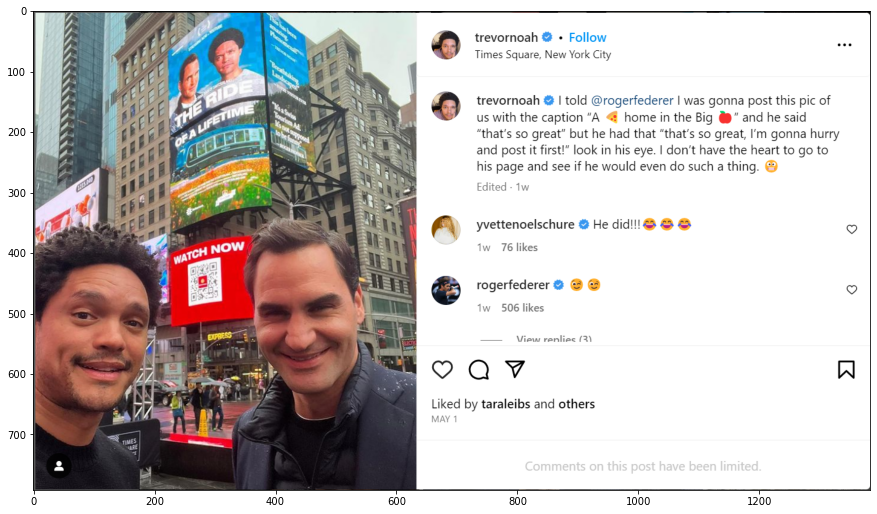

In [48]:
fig, ax = plt.subplots(figsize=(15,15))

image = cv2.imread('../inputs/Thesis/happy.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.show()

In [51]:
gray = get_grayscale(image)
rem_noise = remove_noise(gray)
thresh = thresholding(gray)
canny = canny(thresh)
images = {'grayscale': gray, 
          'remove noise': rem_noise,
          'thresholding': thresh, 
          'canny': canny}

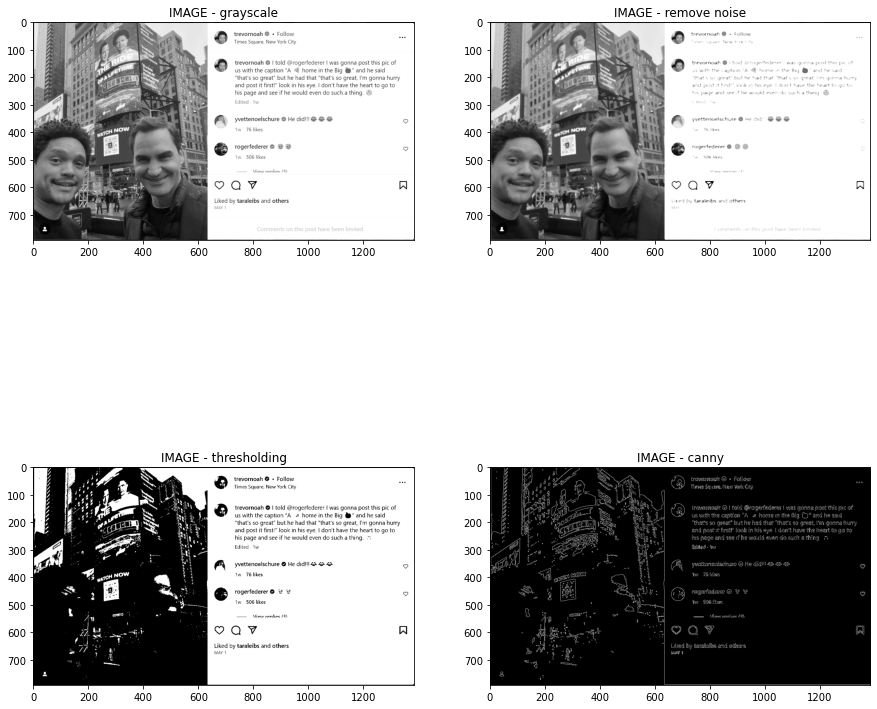

In [52]:
# Plot images after preprocessing

fig = plt.figure(figsize=(15,15))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('IMAGE - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')  

In [56]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'

extracted_text = pytesseract.image_to_string(canny, config=custom_config)

print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(thresh, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(rem_noise, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(canny, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
A 4 if aa ®
A Hh Dh Ne
Z ] Aga “ TSS N trevornoah ®& + Follow
y, 147 7 ~ on ‘ Pr. eee
y f 4 ( 5 YY SiG 2A © — Times Square, New York City
| A argo.
G tel | ee Os Ua aE ba NN
y f E A % ™“ 2 ~ eae se © trevornoah & | told @rogerfederer | was gonna post this pic of
Z j alee 4 Oe SS p> ANS ES Ae ©” us with the caption "A @ home in the Big @" and he said
A f 6f “ott oe pai!) (ine 7 ASS SS “that's so great” but he had that “that's so great, I'm gonna hurry
A : {We Af oe SS 4 ase = 3 and post it first!” look in his eye. | don’t have the heart to go to
| % Pe -Y ay ~ y his page and see if he would even do such a thing. @
1 agg ly , Ville oN yy Edited - tw
a i ee ne TR ate
fh, BY daa: < es thes: a ath F\ yvettenoelschure & He did!!!@ @ @ °
e, De wea tw. 76 likes
E ‘ is tet } rogerfederer% @ @ °
_* oe tw 506 likes
-— * = =
a \ popes SE a j — View renlies (2)
Sw -— + : oe
—) [PM

In [57]:
with open("extracted_text.txt", "w") as file:
    file.write(extracted_text)
